In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('Company_Data.csv')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
data.info()
#no null value present in data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [9]:
data=pd.get_dummies(data)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [10]:
data['Sales']=pd.cut(data['Sales'],bins=3)
data.head()
#Here in problem statement it's mentioned that we have to convert Sales data into categorical data.
#So main idea to convert this continuous data into categorical data is,first cut the data into desired bins.
#Then use LabelEncoder to transform the bins into catogery
#here I cut the data into 3 bins.

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,"(5.423, 10.847]",138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,"(10.847, 16.27]",111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,"(5.423, 10.847]",113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,"(5.423, 10.847]",117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,"(-0.0163, 5.423]",141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [12]:
from sklearn.preprocessing import LabelEncoder
scalar=LabelEncoder()
data['Sales']=scalar.fit_transform(data['Sales'])
data.head()
#now we have Sales data as a catogerical data.

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,1,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,2,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,1,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,1,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,0,141,64,3,340,128,38,13,1,0,0,0,1,1,0


# Builded Model using entropy criterion

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [15]:
X=data.drop('Sales',axis=1)
y=data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [32]:
accuracy=[]
for i in range(1,50):
    model=DecisionTreeClassifier(criterion='entropy',max_depth=i)
    model.fit(X_train,y_train)
    predict=model.predict(X_test)
    accuracy.append(np.mean(predict==y_test))
max(accuracy)

0.75

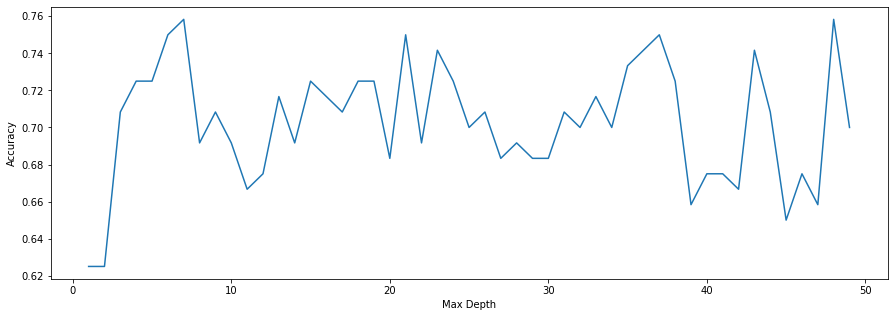

In [45]:
fig=plt.figure(figsize=(15,5))
plt.plot(range(1,50),accuracy)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()
# near 10 we have maximum accuracy which is 0.75
#model is good

[Text(219.6756602112676, 206.56799999999998, 'X[8] <= 0.5\nentropy = 1.3\nsamples = 280\nvalue = [76, 172, 32]'),
 Text(131.66540492957748, 184.824, 'X[4] <= 105.5\nentropy = 1.185\nsamples = 224\nvalue = [74, 138, 12]'),
 Text(50.69154929577465, 163.07999999999998, 'X[5] <= 54.5\nentropy = 1.173\nsamples = 74\nvalue = [10, 52, 12]'),
 Text(23.577464788732392, 141.336, 'X[0] <= 142.0\nentropy = 0.845\nsamples = 33\nvalue = [0, 24, 9]'),
 Text(18.861971830985915, 119.592, 'X[1] <= 61.5\nentropy = 0.722\nsamples = 30\nvalue = [0, 24, 6]'),
 Text(14.146478873239436, 97.848, 'entropy = 0.0\nsamples = 10\nvalue = [0, 10, 0]'),
 Text(23.577464788732392, 97.848, 'X[0] <= 123.0\nentropy = 0.881\nsamples = 20\nvalue = [0, 14, 6]'),
 Text(9.430985915492958, 76.10399999999998, 'X[6] <= 14.5\nentropy = 0.722\nsamples = 15\nvalue = [0, 12, 3]'),
 Text(4.715492957746479, 54.360000000000014, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9, 0]'),
 Text(14.146478873239436, 54.360000000000014, 'X[3] <= 230.0

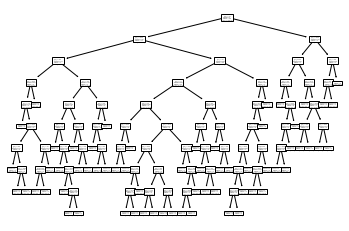

In [48]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=9)
model.fit(X_train,y_train)
tree.plot_tree(model)

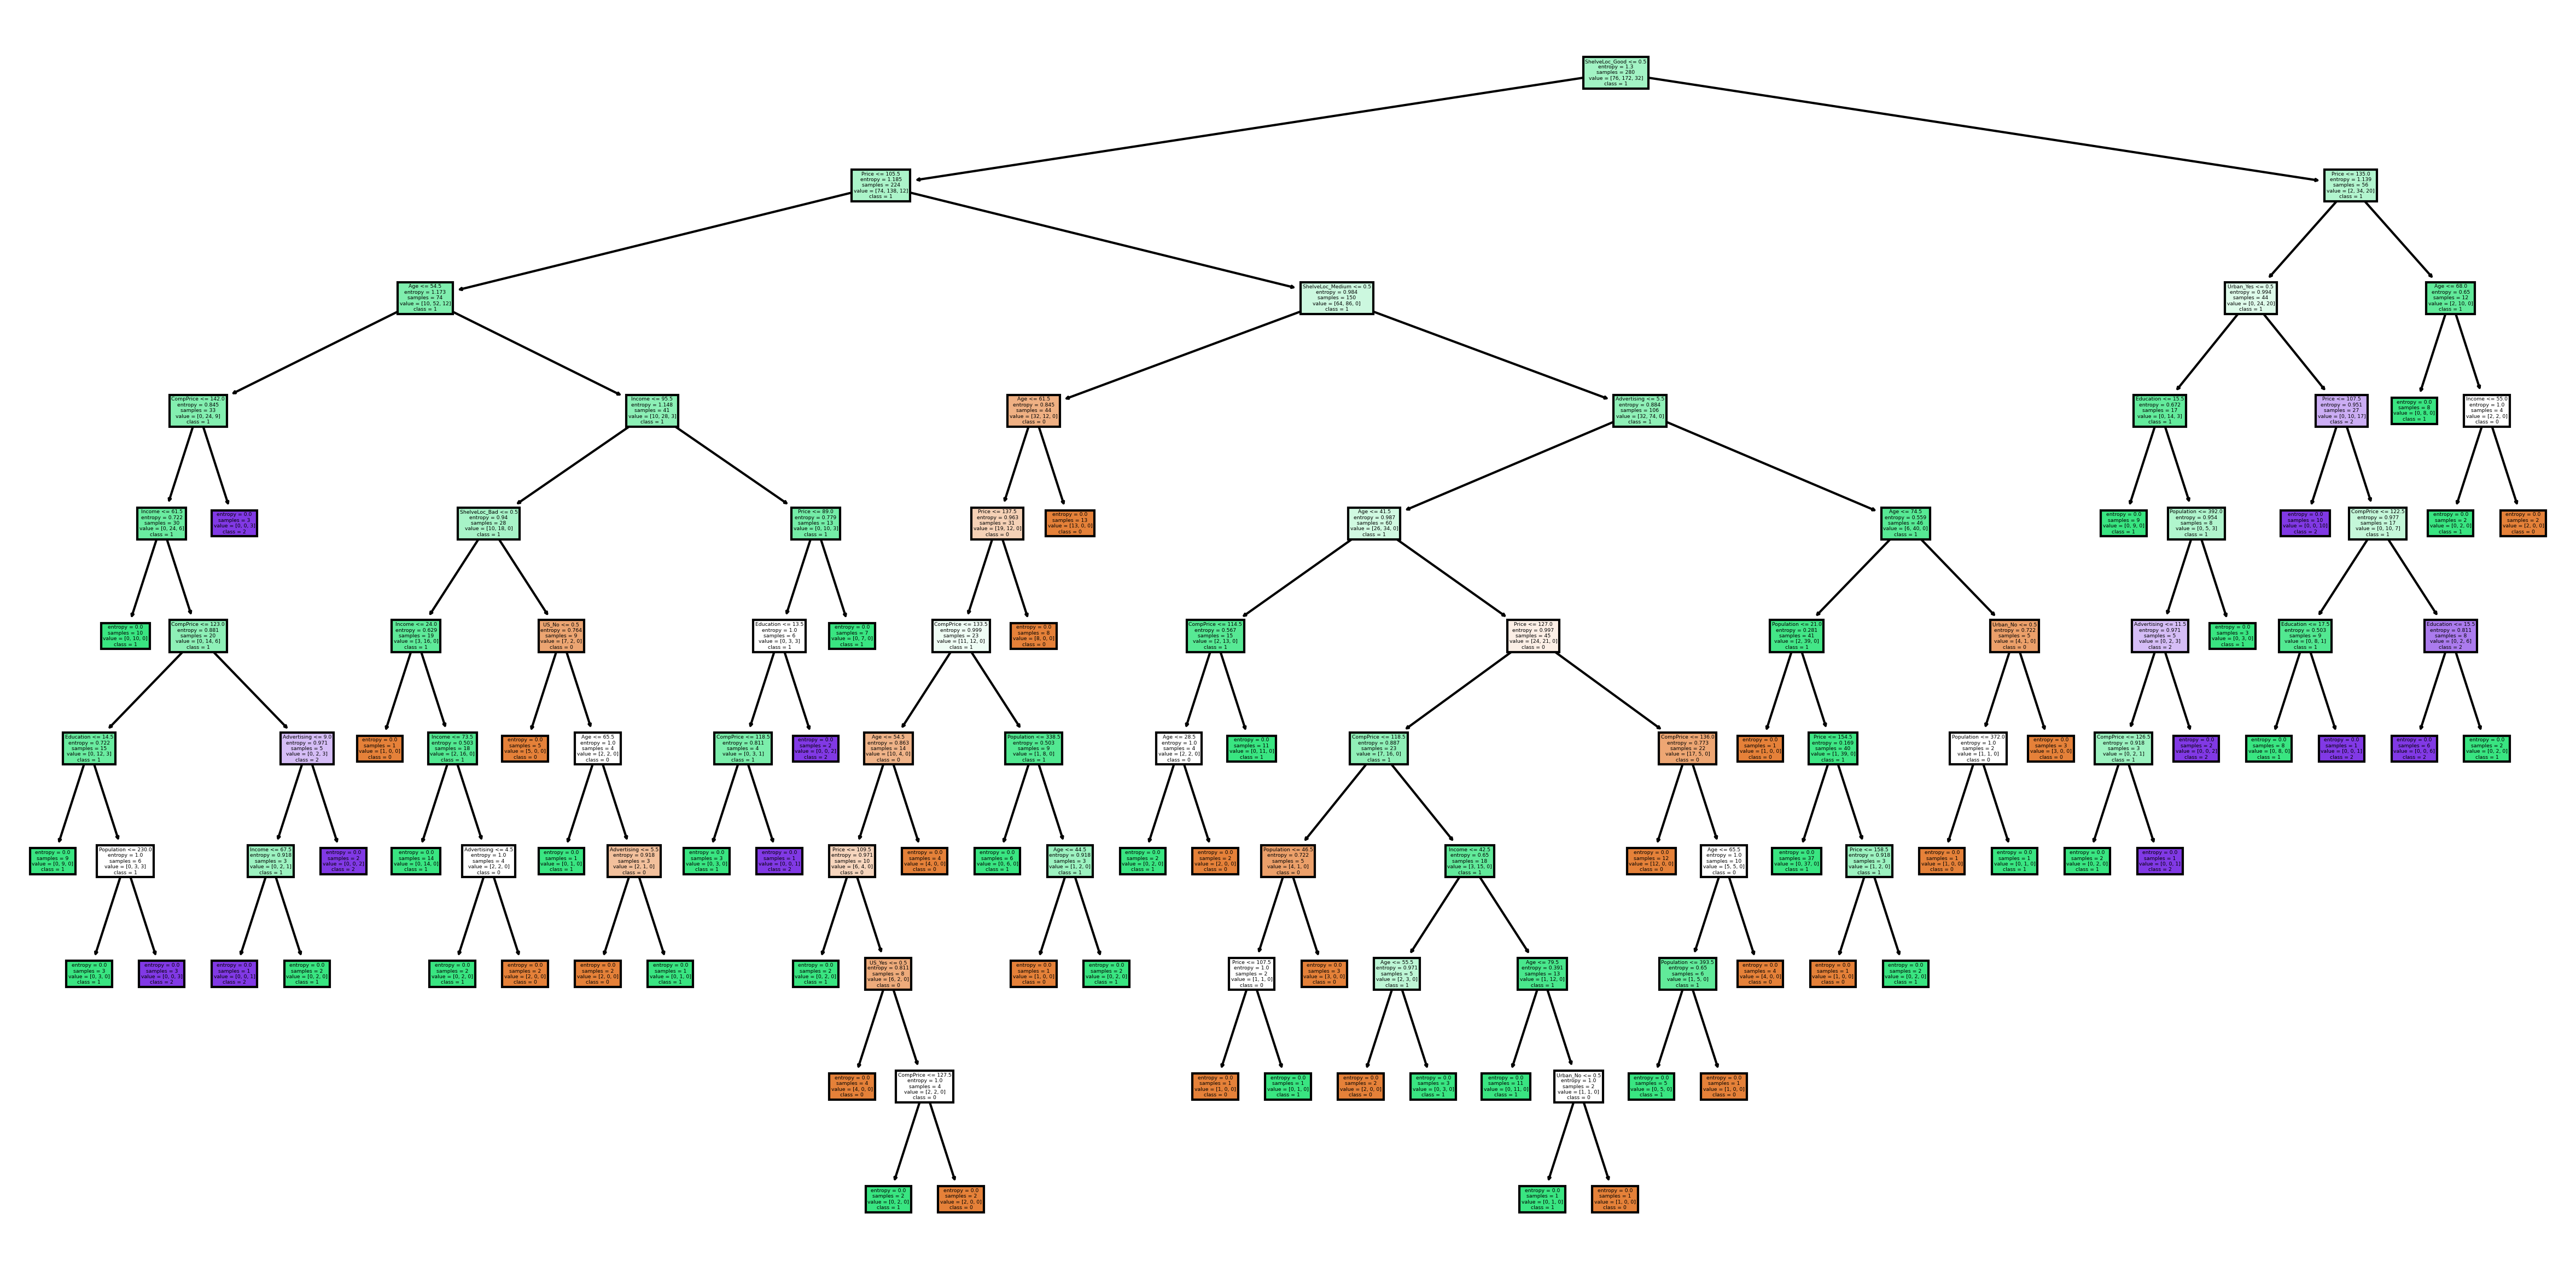

In [41]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10), dpi=300)
tree.plot_tree(model,
               feature_names =X_train.columns, 
               class_names=['0','1','2'],
               filled = True);
#we have to zoom in for visualing tree properly.

In [49]:
pred=model.predict(X_test)
pred

array([0, 0, 1, 0, 1, 0, 2, 1, 2, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 2, 0, 0, 1, 1,
       2, 1, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 2, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1,
       1, 1, 2, 1, 0, 1, 2, 1, 1, 1], dtype=int64)

In [50]:
pd.crosstab(pred,y_test)

Sales,0,1,2
row_0,,,
0,19,10,0
1,7,59,7
2,0,6,12


In [51]:
np.mean(pred==y_test)
#model is good

0.75

# Builded Model using Gini criterion

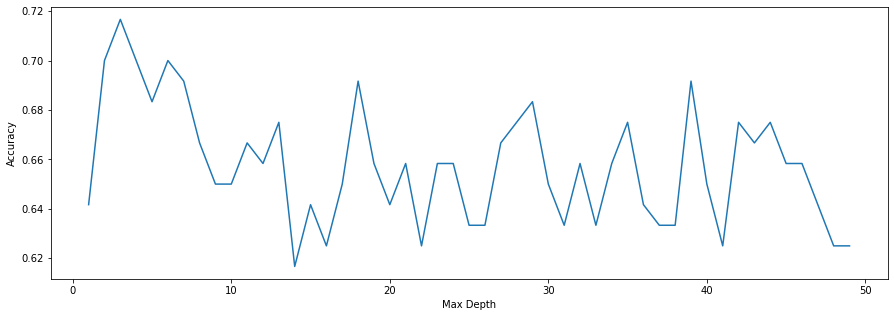

In [52]:
accuracy=[]
for i in range(1,50):
    model=DecisionTreeClassifier(criterion='gini',max_depth=i)
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    accuracy.append(np.mean(pred==y_test))
fig=plt.figure(figsize=(15,5))
plt.plot(range(1,50),accuracy)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()
#Using Gini Criterion, we got maximum accuracy around 0.72
#this model is also good.

In [57]:
model=DecisionTreeClassifier(criterion='gini',max_depth=3)
model.fit(X_train,y_train)
pred=model.predict(X_test)
np.mean(pred==y_test)

0.7166666666666667